- KoNLPy 한국어 처리 패키지
- 말뭉치 kolaw(헌법), kobill(국회법)

In [2]:
import konlpy

In [3]:
konlpy.__version__

'0.5.2'

In [4]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [7]:
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [47]:
txt = kobill.open('1809890.txt').read()
# txt

### 형태소 분석
- 명사 : nouns()
- 형태소 : morphs()
- 품사 : pos()

In [11]:
from konlpy.tag import *
hannanum = Hannanum() # 카이스트
kkma = Kkma() # 서울대

In [12]:
hannanum.nouns(txt[:40])

['지방공무원법', '일부개정법률안', '정의화의원', '대표발', '의', '번']

In [13]:
kkma.nouns(txt[:40])

['지방',
 '지방공무원법',
 '공무원',
 '법',
 '일부',
 '일부개정법률안',
 '개정',
 '법률안',
 '정의',
 '정의화의원',
 '화',
 '의원',
 '대표',
 '대표발의',
 '발의',
 '의',
 '안',
 '호']

In [14]:
hannanum.morphs(txt[:40])

['지방공무원법', '일부개정법률안', '(', '정의화의원', '대표발', '의', ')', '의', '안', '번', '호']

In [15]:
kkma.morphs(txt[:40])

['지방',
 '공무원',
 '법',
 '일부',
 '개정',
 '법률안',
 '(',
 '정의',
 '화',
 '의원',
 '대표',
 '발의',
 ')',
 '의',
 '안',
 '벌',
 'ㄴ',
 '호']

In [16]:
hannanum.pos(txt[:40])

[('지방공무원법', 'N'),
 ('일부개정법률안', 'N'),
 ('(', 'S'),
 ('정의화의원', 'N'),
 ('대표발', 'N'),
 ('의', 'J'),
 (')', 'S'),
 ('의', 'N'),
 ('안', 'M'),
 ('번', 'N'),
 ('호', 'I')]

In [17]:
kkma.pos(txt[:40])

[('지방', 'NNG'),
 ('공무원', 'NNG'),
 ('법', 'NNG'),
 ('일부', 'NNG'),
 ('개정', 'NNG'),
 ('법률안', 'NNG'),
 ('(', 'SS'),
 ('정의', 'NNG'),
 ('화', 'NNG'),
 ('의원', 'NNG'),
 ('대표', 'NNG'),
 ('발의', 'NNG'),
 (')', 'SS'),
 ('의', 'NNG'),
 ('안', 'NNG'),
 ('벌', 'VV'),
 ('ㄴ', 'ETD'),
 ('호', 'NNG')]

In [18]:
from konlpy.tag import Twitter
t = Twitter()

D:\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [19]:
token_ko = t.nouns(txt)

In [21]:
import nltk
ko = nltk.Text(token_ko, name = '국회법안')

In [26]:
print(len(ko.tokens))
print(len(set(ko.tokens)))

735
250


In [27]:
# 시각화 패키지
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

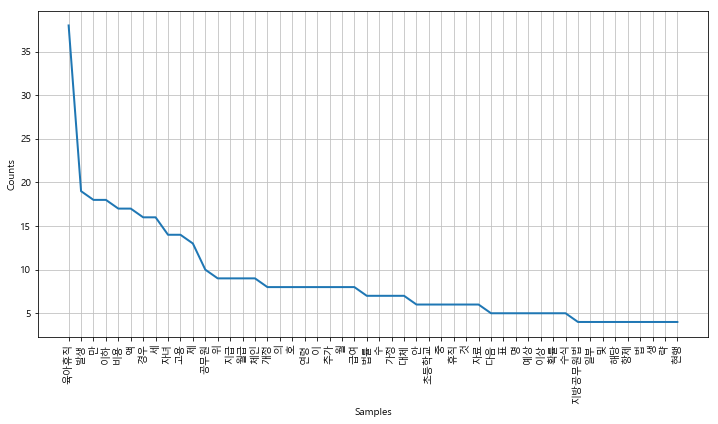

In [29]:
plt.figure(figsize = (12, 6))
ko.plot(50)
plt.show()

In [30]:
sw = ['만', '액', '세', '위', '의', '호', '이', '수', '명', '및', '것', '략'] 

In [36]:
ko = [word for word in ko if word not in sw]

In [37]:
ko = nltk.Text(ko, name = '국회법안')
ko

<Text: 국회법안>

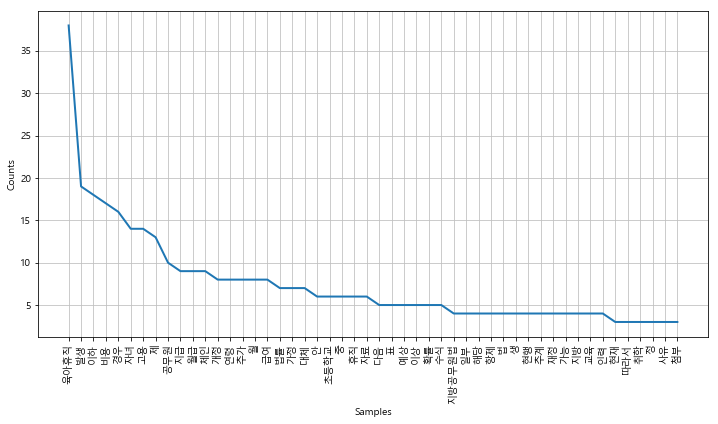

In [38]:
plt.figure(figsize = (12, 6))
ko.plot(50)
plt.show()

In [39]:
ko.count('초등학교')

6

In [41]:
data = ko.vocab().most_common(150)

In [45]:
from wordcloud import WordCloud, STOPWORDS

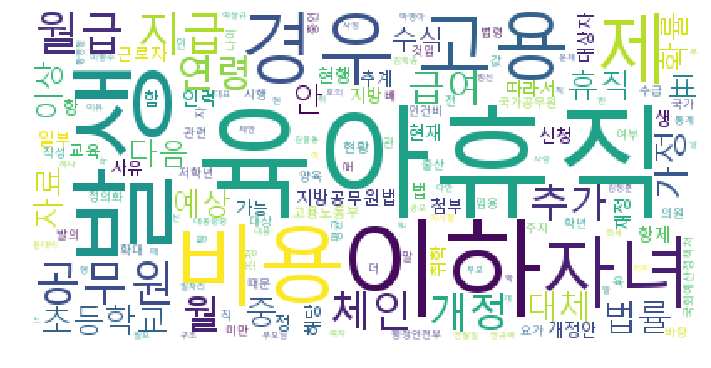

In [46]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()